In [2]:
import numpy as np

In [3]:
#load data from file, and extract x,y and sample
def load_data(file_path):
    f=open(file_path,'r')
    lines=f.readlines()
    sample=len(lines)  #總共的sample個數

    x = np.zeros((sample, 5))  #x多宣告一個維度
    y = np.zeros((sample, 1))
    x[:,0]=1 #強制讓第一個維度的值=1
    index=0

    for line in lines:
        item=line.strip().split()
        x[index,1:5]=np.array([float(i) for i in item[0:4]]).reshape(1,4)
        y[index,0]=float(item[4])
        index+=1
    
    return x,y,sample

In [4]:
#PLA, input: x,y,sample
#回傳PLA過幾個updates後才停止, cnt
def PLA(x,y,sample):
    w=np.zeros((5,1))
    halt_flag=0  #indicate whether PLA should halt or not; 1:halt
    cnt=0 #count after how many updates will the PLA halt
    index=0  #iterate from 0
    correct_cnt=0  #count how many samples already correct, if correct_cnt=sample, PLA can halt

    while(halt_flag==0):
        #check whether need update
        if y[index,0]*(np.dot(x[index], w)[0])<=0:
            #update w
            w=w+y[index,0]*np.mat(x[index]).T
            #reset correct count
            correct_cnt=0
            cnt+=1
        else:
            correct_cnt+=1

        if index==sample-1:
            index=0
        else:
            index+=1
        
        if correct_cnt==sample:
            halt_flag=1
            
    return cnt

## Coursera Q.15

In [4]:
x,y,sample=load_data('hw1_7_train.dat.txt')
update=PLA(x,y,sample)
print("total updates: ", update)

total updates:  45


In [5]:
#PLA given random index cycle
def PLA_rancycle(x,y,sample,index_list,learning_rate):
    w=np.zeros((5,1))
    halt_flag=0  #indicate whether PLA should halt or not; 1:halt
    cnt=0 #count after how many updates will the PLA halt
    index=0  #iterate from 0
    correct_cnt=0  #count how many samples already correct, if correct_cnt=sample, PLA can halt

    while(halt_flag==0):
        ran_index=index_list[index]
        #check whether need update
        if y[ran_index,0]*(np.dot(x[ran_index], w)[0])<=0:
            #update w
            w=w+learning_rate*y[ran_index,0]*np.mat(x[ran_index]).T
            #reset correct count
            correct_cnt=0
            cnt+=1
        else:
            correct_cnt+=1

        if index==sample-1:
            index=0
        else:
            index+=1
        
        if correct_cnt==sample:
            halt_flag=1
            
    return cnt

## Coursera Q.16

In [6]:
import random
x,y,sample=load_data('hw1_7_train.dat.txt')
update_list=[]

for i in range(2000):
    index_list=list(range(0,400))
    random.shuffle(index_list)
    update_list.append(PLA_rancycle(x,y,sample,index_list,1))
    
avg=sum(update_list)/2000
print(avg)

40.081


## Coursera Q.17
* similar to Q.16, only replace learning rate to 0.5

In [7]:
import random
x,y,sample=load_data('hw1_7_train.dat.txt')
update_list=[]

for i in range(2000):
    index_list=list(range(0,400))
    random.shuffle(index_list)
    update_list.append(PLA_rancycle(x,y,sample,index_list,0.5))
    
avg=sum(update_list)/2000
print(avg)

39.96


In [66]:
#calculate error rate, given w
def PLA_err(x,y,sample,w):
    correct,incorrect=0, 0
    #check every sample to count correct/ incorrect number
    for i in range(sample):
        if np.sign(y[i])!=np.sign((np.dot(x[i], w))):
            incorrect+=1
        else:
            correct+=1
    err=incorrect/sample
    return err

In [71]:
def PLA_pocket(x,y,sample,index_list,learning_rate,updates):
    w_pocket, w=np.zeros((5,1)), np.zeros((5,1))
    #halt_flag=0  #indicate whether PLA should halt or not; 1:halt
    #cnt=0 #count how many updates PLA has already done
    #index=0  #iterate from 0
    w_pocket_err=PLA_err(x,y,sample,w_pocket)  #store w_pocket error rate
    """
    while(cnt!=updates):
        ran_index=index_list[index]
        #check whether need update
        if y[ran_index,0]*(np.dot(x[ran_index], w)[0])<=0:
            #update w
            w=w+learning_rate*y[ran_index,0]*np.mat(x[ran_index]).T
            cnt+=1
            
            w_err=PLA_err(x,y,sample,w)
            #check if we need to update w_pocket by comparing error rate
            if w_err < w_pocket_err:
                w_pocket=w
                w_pocket_err=w_err

        if index==sample-1:
            index=0
        else:
            index+=1
        
        #if cnt==updates:
            #halt_flag=1
    """
    for i in range(updates):
        ran_index=index_list[i]
        #check whether need update
        #if y[ran_index,0]*(np.dot(x[ran_index], w)[0])<=0:
        if np.sign(y[ran_index])!=np.sign((np.dot(x[ran_index], w))):
            #update w
            #w=w+learning_rate*y[ran_index,0]*np.mat(x[ran_index]).T
            w=w+np.mat(learning_rate*y[ran_index]*x[ran_index]).T
            #w=w+learning_rate*y[ran_index,0]*np.array(x[ran_index]).T
            
            w_err=PLA_err(x,y,sample,w)
            #check if we need to update w_pocket by comparing error rate
            if w_err < w_pocket_err:
                w_pocket=w
                w_pocket_err=w_err
            
    return w_pocket_err, w_err

In [59]:
x[0]

array([1.     , 0.94544, 0.42842, 0.79833, 0.16244])

## Coursera Q.18

In [72]:
x,y,sample=load_data('hw1_18_train.dat.txt')
x_test,y_test,sample_test=load_data('hw1_18_test.dat.txt')

learning_rate, updates=1, 50
err_list=[]
"""
w_test=PLA_pocket(x,y,sample,index_train,learning_rate,updates)
err_test=PLA_err(x_test,y_test,sample_test,w_test)
err_list.append(err_test)
"""
for i in range(2000):
    index_train=list(range(0,sample))
    random.shuffle(index_train)
    w_pocket_err, w_err=PLA_pocket(x,y,sample,index_train,learning_rate,updates)
    err_list.append(w_pocket_err)


avg=sum(err_list)/2000
print(avg)

0.18712399999999998


## Coursera Q.19

In [84]:
%%time
x,y,sample=load_data('hw1_18_train.dat.txt')
x_test,y_test,sample_test=load_data('hw1_18_test.dat.txt')

learning_rate, updates=1, 50
err_list=[]

for i in range(2000):
    index_train=list(range(0,sample))
    random.shuffle(index_train)
    w_pocket_err, w_err=PLA_pocket(x,y,sample,index_train,learning_rate,updates)
    err_list.append(w_err)
    
avg=sum(err_list)/2000
print(avg)

0.30718899999999966
Wall time: 2min 19s


## Coursera Q.20

In [86]:
%%time
x,y,sample=load_data('hw1_18_train.dat.txt')
x_test,y_test,sample_test=load_data('hw1_18_test.dat.txt')

learning_rate, updates=1, 100
err_list=[]

for i in range(2000):
    index_train=list(range(0,sample))
    random.shuffle(index_train)
    w_pocket_err, w_err=PLA_pocket(x,y,sample,index_train,learning_rate,updates)
    err_list.append(w_pocket_err)
    
avg=sum(err_list)/2000
print(avg)

0.14210299999999945
Wall time: 4min 10s


## Q. 7

In [8]:
%%time
import random
x,y,sample=load_data('hw1_7_train.dat.txt')
update_list=[]

for i in range(1124):
    index_list=list(range(0,400))
    random.shuffle(index_list)
    update_list.append(PLA_rancycle(x,y,sample,index_list,1))
    
avg=sum(update_list)/1124
print(avg)

39.54893238434164
Wall time: 11.6 s


In [13]:
max(update_list)

77

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   4.,   0.,
          2.,   0.,   3.,   0.,   0.,   1.,   0.,  10.,   0.,  31.,   0.,
         54.,   0.,  42.,   0.,  26.,   1.,  15.,   6.,   3.,  17.,   0.,
         59.,   0.,  99.,   0., 139.,   0., 120.,   0., 113.,   0.,  80.,
          2.,  29.,   2.,  16.,   9.,   7.,  16.,   0.,  32.,   0.,  52.,
          0.,  38.,   0.,  35.,   0.,  30.,   0.,  15.,   0.,   6.,   0.,
          3.,   0.,   3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 79 Patch objects>)

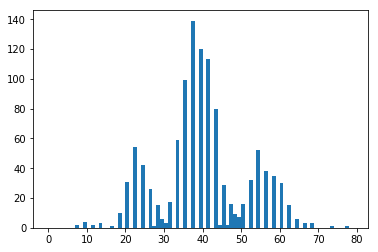

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

bins=np.arange(0,80)
plt.hist(update_list,bins)